In [2]:
import tensorflow as tf
from tensorflow import keras
# ----- In this example we we will use tensorflow callbacks such as EarlyStopping and ModelCheckpoint to monitor and modify the behaviour of model during training and evaluation.

# ----- Load the MNIST dataset from TensorFlow's built-in datasets
# MNIST is a collection of 70,000 handwritten digit images (0–9) used for training and testing image classification models
mnist = tf.keras.datasets.mnist

# ----- Loaded the MNIST handwritten digits dataset.
# It automatically downloads and splits data into:
# x_train, y_train → training images and labels (60,000 samples)
# x_test, y_test   → testing images and labels (10,000 samples)
# Each image is 28x28 pixels (grayscale) and each label is a digit from 0–9.)

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# ------ Normalized the image pixel values so each image has values between 0 and 1.
# This helps the model train faster and perform better by keeping all inputs on a similar scale.
# 'axis=1' means normalization is done across each row of the image.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Initialize a Sequential model — layers will be added one after another
model = keras.Sequential([
    keras.layers.Flatten(), # Flatten layer converts 2D input (like 28x28 pixel images) into 1D array (784 values)
                            # Needed before passing image data into Dense (fully connected) layers
    keras.layers.Dense(128, activation='relu'), # First hidden layer with 128 neurons
                                                # 'Dense' means fully connected — every input connects to every neuron
                                                # 'relu' (Rectified Linear Unit) activation helps the model learn non-linear patterns efficiently
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,  activation='softmax') # Output layer with 10 neurons — one for each class (e.g., digits 0–9 in MNIST dataset)
                                                  # 'softmax' activation converts raw outputs into probabilities that sum to 1
])

                    




# Compile the model before training — this step defines how the model will learn
model.compile(
    optimizer='adam',                     # 'adam' is an adaptive optimizer that adjusts learning rate automatically for efficient training
    loss='sparse_categorical_crossentropy', # Suitable for multi-class classification when labels are integers (not one-hot encoded)
    metrics=['accuracy']                  # Tracks model performance — here, we measure how often predictions are correct
)



In [3]:
# Define Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True, monitor='val_loss')

# Train the model on the training data
model.fit(x_train,y_train,epochs=10,validation_split=0.2,
          callbacks=[early_stopping, model_checkpoint]) #epochs=10 → The model will go through the entire training dataset 10 times to learn patterns and minimize loss.
                                   #Each epoch improves the model’s weights step by step, and the accuracy typically increases with more epochs (until overfitting occurs).


Epoch 1/10
1489/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8552 - loss: 0.5168

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9149 - loss: 0.2910 - val_accuracy: 0.9542 - val_loss: 0.1503
Epoch 2/10
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9640 - loss: 0.1247

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9645 - loss: 0.1192 - val_accuracy: 0.9643 - val_loss: 0.1163
Epoch 3/10
1489/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9771 - loss: 0.0743

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9749 - loss: 0.0799 - val_accuracy: 0.9680 - val_loss: 0.1040
Epoch 4/10
1477/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9832 - loss: 0.0546

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9818 - loss: 0.0573 - val_accuracy: 0.9701 - val_loss: 0.1020
Epoch 5/10
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9879 - loss: 0.0388

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9864 - loss: 0.0431 - val_accuracy: 0.9723 - val_loss: 0.1012
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9894 - loss: 0.0327 - val_accuracy: 0.9682 - val_loss: 0.1095
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9909 - loss: 0.0261 - val_accuracy: 0.9693 - val_loss: 0.1190
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9713 - val_loss: 0.1153
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9942 - loss: 0.0170 - val_accuracy: 0.9691 - val_loss: 0.1332


In [4]:
#Next thing we are gonna do is calculate the validation loss and vaidation accuracy

# Evaluate the trained model on the test dataset
# This checks how well the model performs on data it hasn't seen before
val_loss, val_acc = model.evaluate(x_test, y_test)

# Print the test loss (error) and accuracy
# Lower loss and higher accuracy indicate better model performance
print(val_loss, val_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0890
0.08895895630121231 0.9735000133514404


In [5]:
# Save model 
model.save('my_model.keras') # Save the entire trained model (architecture + weights + optimizer state) 
                             # This allows you to reload the model later without retraining.

# Load the saved model
new_model = tf.keras.models.load_model('my_model.keras')

# --- Making predictions with the loaded model ---
# Use the reloaded model to make predictions on the test dataset.
# The model outputs probabilities for each of the 10 classes (digits 0–9 in MNIST).
predictions = new_model.predict(x_test)


print(predictions) # --- Displaying predictions ---
# Print the prediction results — each prediction is an array of 10 probabilities
# showing the likelihood of the image belonging to each digit class.


 27/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[6.49639995e-11 2.63353343e-07 1.06383834e-06 ... 9.99984503e-01
  9.52191836e-09 4.90371903e-08]
 [4.36293715e-13 1.15134135e-05 9.99988437e-01 ... 8.03053013e-10
  4.43622326e-11 1.15600964e-14]
 [7.12979942e-09 9.99977946e-01 6.37853191e-07 ... 1.57381983e-05
  3.77063543e-06 1.46867682e-08]
 ...
 [1.42591425e-11 1.33005367e-08 1.28767122e-10 ... 1.72021402e-07
  1.04316698e-08 1.42018007e-06]
 [5.99325040e-06 6.36021184e-07 2.32088311e-07 ... 5.77377762e-07
  5.41474961e-04 4.68613370e-10]
 [1.24204060e-08 1.43447476e-08 6.87629793e-08 ... 1.95887143e-11
  2.16646834e-09 2.80143048e-10]]


In [8]:
import numpy as np
print(np.argmax(predictions[5]))

1


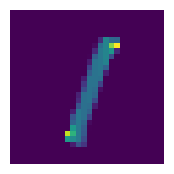

In [11]:
# Import the pyplot submodule from matplotlib for displaying images
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
plt.imshow(x_test[5,]) # Display the second test image (index 1)
plt.axis('off') # Hide the axis ticks and labels for a cleaner display
plt.show()